Checking data on NeuN+ samples for CMC individual IDs MSSM_056 MSSM_193 MSSM_331 PITT_060 PITT_101 PITT_036 PITT_060 MSSM_304.  The FASTQ files reside in the 2016-10-11-HK and 2016-08-15-DV-X10 subdirectories under ada:/projects/bsm/reads/

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import attila_utils
import correct_rg_HK
import data_check
import pandas as pd

In [2]:
pwd

'/home/attila/projects/bsm/notebook/2019-11-19-data-check'

In [3]:
%%bash
cd /projects/bsm/attila/results/2019-11-19-data-check
for sample in MSSM_056 MSSM_193 MSSM_331 PITT_060 PITT_101 PITT_036 PITT_060 MSSM_304; do
    find /projects/bsm/alignments/ -name "${sample}_NeuN_pl.bam"
done > CMC-bam-names
cat CMC-bam-names

/projects/bsm/alignments/MSSM_056/MSSM_056_NeuN_pl.bam
/projects/bsm/alignments/MSSM_193/MSSM_193_NeuN_pl.bam
/projects/bsm/alignments/MSSM_331/MSSM_331_NeuN_pl.bam
/projects/bsm/alignments/PITT_060/PITT_060_NeuN_pl.bam
/projects/bsm/alignments/PITT_101/PITT_101_NeuN_pl.bam
/projects/bsm/alignments/PITT_036/PITT_036_NeuN_pl.bam
/projects/bsm/alignments/PITT_060/PITT_060_NeuN_pl.bam
/projects/bsm/alignments/MSSM_304/MSSM_304_NeuN_pl.bam


## Mapped reads

In [4]:
indivs = ['MSSM_056', 'MSSM_193', 'MSSM_331', 'PITT_060', 'PITT_101', 'PITT_036', 'PITT_060', 'MSSM_304']
idxstats = pd.concat([data_check.idxstats(s, 'NeuN_pl') for s in indivs], axis=0)
idxstats

,Name,Length,Mapped,Unmapped,% Unmapped,Sample
0,1,249250621,191689852,235579,0.122745,MSSM_056_NeuN_pl
1,2,243199373,203441520,262257,0.128744,MSSM_056_NeuN_pl
2,3,198022430,164530889,201522,0.122333,MSSM_056_NeuN_pl
3,4,191154276,158845796,194178,0.122094,MSSM_056_NeuN_pl
4,5,180915260,150585880,185074,0.122752,MSSM_056_NeuN_pl
...,...,...,...,...,...,...
82,GL000225.1,211173,408011,949,0.232052,MSSM_304_NeuN_pl
83,GL000192.1,547496,483138,880,0.181811,MSSM_304_NeuN_pl
84,NC_007605,171823,1455,53,3.514589,MSSM_304_NeuN_pl
85,hs37d5,35477943,158475898,263545,0.166024,MSSM_304_NeuN_pl


['named-figure/unmapped-reads.png', 'named-figure/unmapped-reads.pdf']

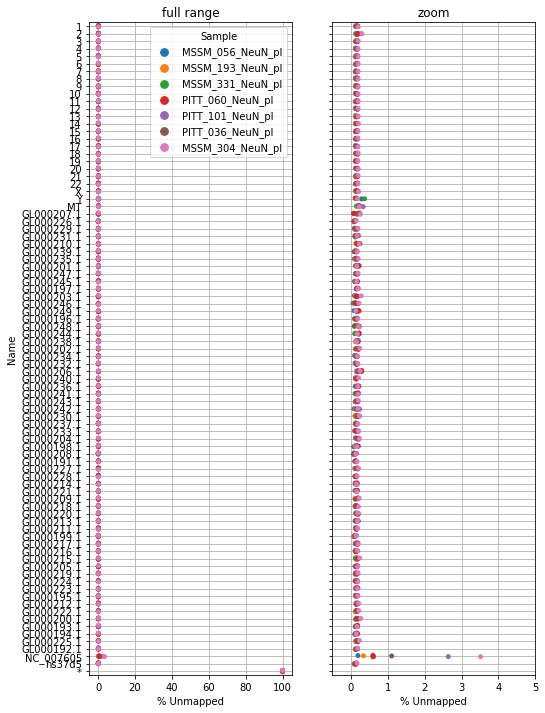

In [5]:
fig = data_check.idxstats_contig_plot(idxstats)
attila_utils.savefig(fig, 'unmapped-reads')

## Sample purity and label swap

In [6]:
%%bash
if false; then
    cd /projects/bsm/attila/results/2019-11-19-data-check                                                                               
    script=/home/attila/projects/bsm/notebook/2018-12-18-verifyBamID/CMCverifyBamID.2
    for bam in `cat CMC-bam-names`; do
        $script $bam &
    done
fi

In [7]:
%%bash
cd /projects/bsm/attila/results/2019-11-19-data-check
/home/attila/projects/bsm/notebook/2018-12-18-verifyBamID/aggregate-selfSM
echo output file:
realpath all.selfSM

output file:
/projects/bsm/attila/results/2019-11-19-data-check/all.selfSM


In [8]:
selfSM = pd.read_csv('/projects/bsm/attila/results/2019-11-19-data-check/all.selfSM', sep='\t')
selfSM

,sample,indivID,tissue,SEQ_ID,RG,CHIP_ID,SNPS,READS,AVG_DP,FREEMIX,...,FREE_RH,FREE_RA,CHIPMIX,CHIPLK1,CHIPLK0,CHIP_RH,CHIP_RA,DPREF,RDPHET,RDPALT
0,MSSM_056_NeuN_pl,MSSM_056,NeuN_pl,0_MSSM_127,ALL,0_MSSM_127,668238,13049448,19.53,0.00586,...,NaN,NaN,0.00569,2943924.65,2974025.13,NaN,NaN,19.516,1.0017,1.0020
1,MSSM_193_NeuN_pl,MSSM_193,NeuN_pl,0_MSSM_250,ALL,0_MSSM_250,668238,13049723,19.53,0.00357,...,NaN,NaN,0.00343,2890090.14,2905634.06,NaN,NaN,19.418,1.0294,0.9623
2,MSSM_331_NeuN_pl,MSSM_331,NeuN_pl,0_MSSM_375,ALL,0_MSSM_375,668238,13049659,19.53,0.00468,...,NaN,NaN,0.00470,2983124.63,3011881.48,NaN,NaN,19.561,0.9962,0.9959
3,PITT_060_NeuN_pl,PITT_060,NeuN_pl,0_PITT_1542,ALL,0_PITT_1542,668238,13049499,19.53,0.00324,...,NaN,NaN,0.00314,2862163.44,2875543.44,NaN,NaN,19.416,1.0294,0.9632


['named-figure/freemix.png', 'named-figure/freemix.pdf']

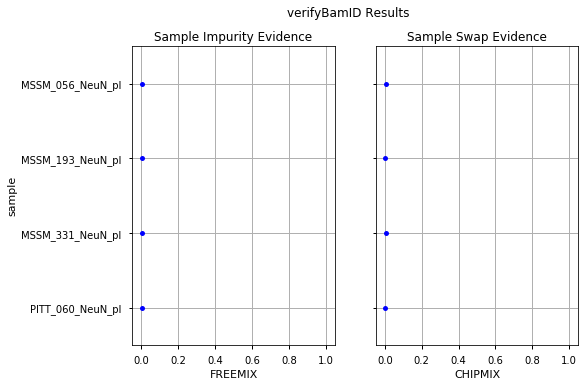

In [9]:
fig = data_check.selfSMplot(selfSM)
attila_utils.savefig(fig, 'freemix')

In [10]:
%connect_info

{
  "shell_port": 35393,
  "iopub_port": 41385,
  "stdin_port": 51831,
  "control_port": 44547,
  "hb_port": 44651,
  "ip": "127.0.0.1",
  "key": "f8a0fa67-ff4b3f4cb11ac0b1ce72593b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-7daf46db-4b6d-4d07-95d8-e954407915c1.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
